<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2021</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 03: Julia lab - constrained optimization </font></p>
</p></br>
</p>
</CENTER>
<p><font size="4"><i>By Kevin Michalewicz</i></font></p>


# <span style="color:#00B8DE">Constrained optimization</span>


Let us consider the following optimization problems

$$
(I) \left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
3x+y\ = 1
\end{array}
\right.
$$

and

$$
(II)\left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
(x+1)^2+(y-3)^2 \leq 1
\end{array}
\right.
$$

**1)** Plot the objective function and the constraints for both problems. 

**2)** Solve (I) with a Newton linearly constrained approach

**3)** Solve (II) with an interior point approach.


## <span style="color:#00B8DE">I - Objective and constraints plot

In [1]:
# Figure
using Pkg
Pkg.add("Plots")

using Plots
pyplot()

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


Plots.PyPlotBackend()

In [2]:
# Objective function
f(x,y) = (1-x)^2 + 100*(y-x^2)^2

# Constraints for each problem
h1(x,y) = 3*x + y - 1
h2(x,y) = (x+1)^2 + (y-3)^2 - 1

# We create x and y vectors of n samples each
n = 200
x = range(-3.5, stop=3.5, length=n)
y = range(-1, stop=6, length=n)

X = repeat(x', n, 1)
Y = repeat(y, 1, n)
Z = f.(X,Y)
H1 = h1.(X,Y)
H2 = h2.(X,Y);

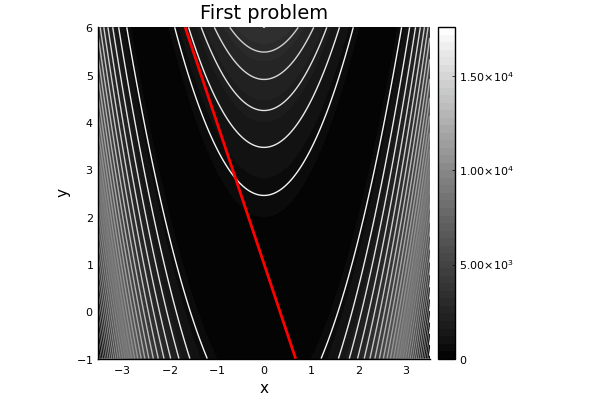

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [3]:
contourf(X, Y, Z, nlevels = 50, c=:greys, title="First problem", xlabel="x", ylabel="y", aspect_ratio=1)
contour!(X, Y, Z, nlevels = 30, c=:grayC)
contour!(X, Y, H1, levels = [0], c=:autumn1, linewidth=2, label="Constraint")

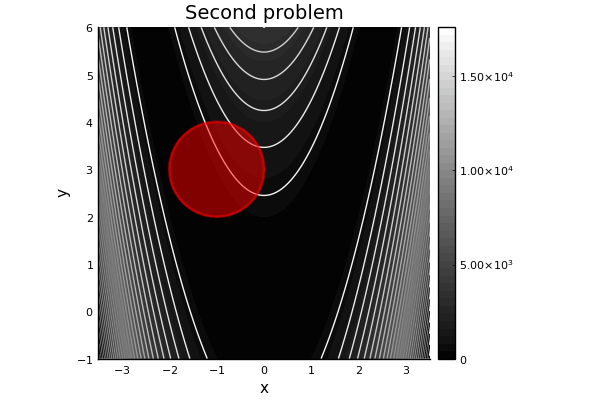

In [4]:
contourf(X, Y, Z, nlevels = 50, c=:greys, title="Second problem", xlabel="x", ylabel="y", aspect_ratio=1)
contour!(X, Y, Z, nlevels = 30, c=:grayC)
contour!(X, Y, H2, levels = [-1, 0], c=:autumn1, linewidth=2, label="Constraint", fill=true, alpha=0.5)

## <span style="color:#00B8DE">II - Linearly constrained Newton

In [5]:
f(x,y)   = (1-x)^2 + 100*(y-x^2)^2
∇f(x,y)  = [-2*(1-x) - 400*x*(y-x^2); 200*(y-x^2)]
∇2f(x,y) = [2 - 400*(y - 3*x^2) -400*x; -400*x 200]

h(x,y)  = 3*x + y - 1
∇h      = [3; 1];

In [260]:
# Backtracking
# same function as the one in the unconstrained optimization notebook
#-------------
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: search direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    α = 0.2
    β = 0.5
    t = 1 
    n = 0 
    
    while f(x[1] + t*d[1], x[2] + t*d[2]) > f(x[1], x[2]) + α*t*(∇f(x[1], x[2]))'*d
        n += 1
        t = β*t
    end
    
    y = x + t*d

    return y, n
    
end

backtracking (generic function with 1 method)

In [284]:
using LinearAlgebra: inv

prec        = 1.e-8
init        = [1,5] # [-2,5]
pt          = init
nb_iter_N   = 0  # number of loops
nb_loops_N  = 0  # number of inner loops count for backtracking
resu_N      = pt
A = ∇h'; b = 1 # because we want to minimize f(x,y) s.t. A[x;y] = b

while true
    ∇ = ∇f(pt[1], pt[2]) # The initial gradient
    # We solve the equation M*d = v
    M = [∇2f(pt[1],pt[2]) A'; A 0]
    v = [-∇; b .- A*pt]
    d = inv(M)*v

    # We extract the desired part of d
    d = d[1:2]
    
    # We apply the backtracking algorithm
    pt, n = backtracking(pt, f, ∇f, d)
    
    # Required updates
    nb_loops_N += n
    nb_iter_N += 1 
    resu_N = [resu_N pt]
    
    if (-∇'*d)/2 < prec  # ∇f(x+td)_{t=0}= ∇'*d
        break
    end
end

In [285]:
println("Number of iterations for constrained Newton = $nb_iter_N")
println("Number of inner loops for constrained Newton = $nb_loops_N")

Number of iterations for constrained Newton = 5
Number of inner loops for constrained Newton = 0


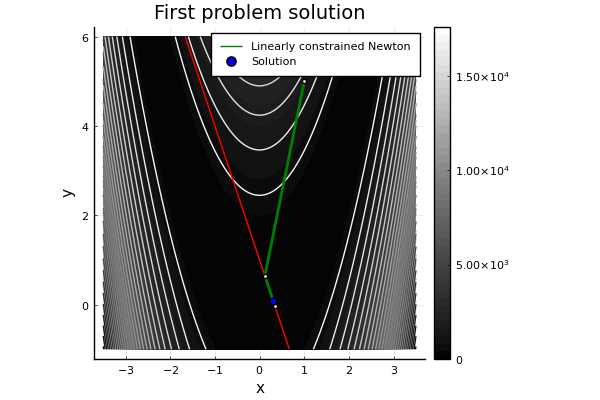

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [286]:
# Figure
contourf(X, Y, Z, nlevels = 50, c=:greys, title="First problem solution", xlabel="x", ylabel="y", aspect_ratio=1)
contour!(X, Y, Z, nlevels = 30, c=:grayC)
contour!(X, Y, H1, levels = [0], c=:autumn1, linewidth=1, label="Constraint")
plot!(resu_N[1,:], resu_N[2,:], color="green", label="Linearly constrained Newton", linewidth=2)
scatter!(resu_N[1,:], resu_N[2,:], label=false, markersize=3, color="white")
scatter!([resu_N[1,end]], [resu_N[2,end]], label="Solution", markersize=5, color="blue")

**Comments:** the algorithm converges with the $(1,5)$ initial condition. However, it does not do a good job always - for instance, for $(-2,5)$ -. The condition number of $M$ in this last case is in the order of $10^6$ (vs around $122$ when it converges) and that means that it is more difficult to compute $M^{-1}$.

## <span style="color:#00B8DE">III - Interior point method

In [293]:
using LinearAlgebra: norm, eigen

prec        = 1.e-12
init        = [-1,3]  # center of the circle
pt          = init
nb_iter_IP  = 0  # number of loops
nb_loops_IP = 0  # number of inner loops count for backtracking
resu_IP     = pt
t = 10
ν = 10
alpha = 1.5
m = 1

# We compute the gradient of h2
∇h2(x,y)=[2*(x+1); 2*(y-3)]

# We define the logarithmic barrier function and its gradient
phi(x,y) = -log(-h2(x,y))
∇phi(x,y) = -∇h2(x,y)/h2(x,y)

# The new function and its gradient are the following
F(x,y) = t*f(x,y) + phi(x,y)
∇F(x,y) = t*∇f(x,y) + ∇phi(x,y)

while true
    nb_iter_IP += 1 
    for k=1:ν # inner loop
        
        d = -∇F(pt[1], pt[2])
        
        # It cannot leave the circle
        while norm(pt + d - init) > 1
            d /= 2
        end
        
        pt, n = backtracking(pt, F, ∇F, d)
        nb_loops_IP += n
    end
    resu_IP = [resu_IP pt]
    if (m/t) < prec
        break
    end
    t = alpha*t
    
end

In [294]:
println("Number of iterations for Interior point = $nb_iter_IP")
println("Number of inner loops for  Interior point = $nb_loops_IP")
println(pt)

Number of iterations for Interior point = 64
Number of inner loops for  Interior point = 9358
[-1.4476020124754776, 2.1057671229331865]


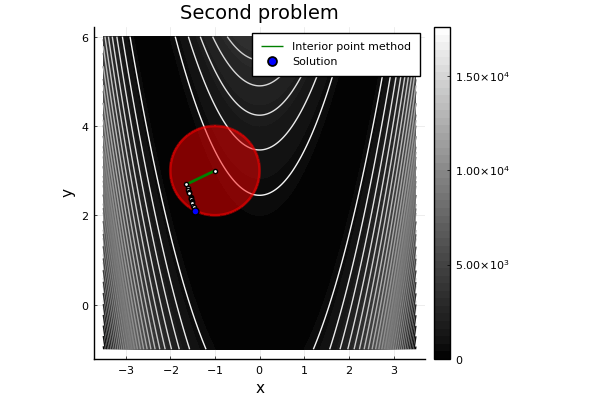

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [295]:
# Figure
contourf(X, Y, Z, nlevels = 50, c=:greys, title="Second problem", xlabel="x", ylabel="y", aspect_ratio=1)
contour!(X, Y, Z, nlevels = 30, c=:grayC)
contour!(X, Y, H2, levels = [-1, 0], c=:autumn1, linewidth=2, label="Constraint", fill=true, alpha=0.5)
plot!(resu_IP[1,:], resu_IP[2,:], color="green", label="Interior point method", linewidth=2)
scatter!(resu_IP[1,:], resu_IP[2,:], label=false, markersize=3, color="white")
scatter!([resu_IP[1,end]], [resu_IP[2,end]], label="Solution", markersize=5, color="blue")

**Comments:** as expected, we cannot choose an initial condition out of the circle. In that case, due to the presence of the logarithm, the algorithm will rest always in the first point. Inside of the circle, it converges sometimes according to the intial conditions and parameters. For example, for $(-1,3)$ it does (center of the circle) for $\nu=10$, $t=10$, $\alpha=1.5$ and $m=1$ but it does not converge if $\nu=1$. 

Always: $\nu$ needs to belong to $[10, 20]$ and $t$ to $[10, 20]$. Also, $\alpha > 1$. 

The solution is in the border of the circle and it takes many iterations to arrive to it.

By contrast, with initial conditions such as $(-0.6,3)$ the algorithm does not converge to the border of the circle even with the same set of parameters as the case where we started in the center of the circle.